In [153]:
import csv
from random import randint, choice

In [154]:
def generate_data():
        name = choice(['John', 'Emily', 'Michael', 'Sophia', 'David', 'Emma', 'Matthew', 'Olivia', 'Daniel', 'Ava', 'Christopher', 'Isabella', 'Andrew', 'Mia', 'Ethan', 'Abigail', 'William', 'Madison', 'James', 'Sophie', 'Alexander', 'Grace', 'Nicholas', 'Avery', 'Benjamin'])
        second_name = choice(['Smith', 'Johnson', 'Williams', 'Jones', 'Brown', 'Davis', 'Miller', 'Wilson', 'Moore', 'Taylor', 'Anderson', 'Thomas', 'Jackson', 'White', 'Harris', 'Martin', 'Thompson', 'Garcia', 'Martinez', 'Lopez'])
        salary = randint(40000, 90000)
        city = choice(['Tokyo', 'Beijing', 'Sydney', 'Toronto', 'Berlin', 'Barcelona', 'Chicago', 'San Francisco', 'Seattle', 'Sydney', 'Dublin', 'Tokyo', 'Seoul', 'Cape Town', 'Mumbai', 'Singapore'])
        age = randint(25, 70)
        vacation_prefer = choice(['Safari', 'Mountain hiking', 'Cruise', 'Food tour', 'Historical sightseeing', 'Relaxation spa', 'Festival', 'Golf retreat'])
        transport_prefer = choice(['car', 'plane', 'train', 'cruise ship'])
        target = choice(['Tokyo', 'Paris', 'New York', 'Barcelona', 'Dubai'])

        return [name, second_name, salary, city, age, vacation_prefer, transport_prefer, target]


In [155]:
csv_file_path = 'lab6_dataset.csv'
with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['name', 'second_name', 'salary', 'city', 'age', 'vacation_prefer', 'transport_prefer', 'target'])
    for _ in range(1000):
        writer.writerow(generate_data())

print(f"CSV file '{csv_file_path}' has been generated with random data.")

CSV file 'lab6_dataset.csv' has been generated with random data.


In [156]:
import pandas as pd
data = pd.read_csv('lab6_dataset.csv')
data.head(10)

,name,second_name,salary,city,age,vacation_prefer,transport_prefer,target
0,James,Jackson,51902,Dublin,31,Golf retreat,plane,Dubai
1,Olivia,Anderson,84130,Seoul,39,Safari,train,New York
2,Michael,White,82032,Chicago,35,Cruise,train,Paris
3,William,Anderson,49010,Singapore,41,Relaxation spa,car,Barcelona
4,Emma,Thompson,60170,Toronto,61,Historical sightseeing,car,Tokyo
5,Madison,White,87804,Chicago,65,Mountain hiking,train,Barcelona
6,Ethan,Moore,43795,Toronto,41,Golf retreat,plane,New York
7,Emily,Taylor,64821,Chicago,70,Golf retreat,cruise ship,Tokyo
8,Michael,Moore,69561,Beijing,64,Relaxation spa,plane,New York
9,Emily,Moore,82446,Singapore,61,Festival,cruise ship,Tokyo


In [160]:
df = pd.DataFrame(data)
df = pd.get_dummies(df, columns=['name', 'second_name', 'salary', 'city', 'age', 'vacation_prefer', 'transport_prefer', 'target'], drop_first=True)
print(df.columns)

Index(['name_Alexander', 'name_Andrew', 'name_Ava', 'name_Avery',
       'name_Benjamin', 'name_Christopher', 'name_Daniel', 'name_David',
       'name_Emily', 'name_Emma',
       ...
       'vacation_prefer_Mountain hiking', 'vacation_prefer_Relaxation spa',
       'vacation_prefer_Safari', 'transport_prefer_cruise ship',
       'transport_prefer_plane', 'transport_prefer_train', 'target_Dubai',
       'target_New York', 'target_Paris', 'target_Tokyo'],
      dtype='object', length=1103)


In [162]:
from sklearn.model_selection import train_test_split

X = df.drop('target_New York', axis=1)
y = df['target_New York']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.79
Confusion Matrix:
[[158   0]
 [ 42   0]]
Classification Report:
              precision    recall  f1-score   support

       False       0.79      1.00      0.88       158
        True       1.00      0.00      0.00        42

    accuracy                           0.79       200
   macro avg       0.90      0.50      0.44       200
weighted avg       0.83      0.79      0.70       200



In [169]:
random_data = {'name': ['John'],
               'second_name': ['Smith'],
               'salary': [65000],
               'city': ['New York'],
               'age': [40],
               'vacation_prefer': ['Beach holiday'],
               'transport_prefer': ['plane']}

random_df = pd.DataFrame(random_data)

# Ensure dummy columns match those used during training
random_df = pd.get_dummies(random_df, columns=['name', 'second_name', 'salary', 'city', 'age', 'vacation_prefer', 'transport_prefer'], drop_first=True)


missing_columns = set(X_train.columns) - set(random_df.columns)
for col in missing_columns:
    random_df[col] = 0

# Ensure the column order is the same as during training
random_df = random_df[X_train.columns]

# Make predictions
prediction = clf.predict(random_df)

print("Predicted Target Destination:", prediction[0])

C:\Users\user\AppData\Local\Temp\ipykernel_25620\1108689345.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  random_df[col] = 0
C:\Users\user\AppData\Local\Temp\ipykernel_25620\1108689345.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  random_df[col] = 0
C:\Users\user\AppData\Local\Temp\ipykernel_25620\1108689345.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

Predicted Target Destination: False


In [170]:
from sklearn.model_selection import cross_val_score, GridSearchCV

X = df.drop('target_New York', axis=1)
y = df['target_New York']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.805 0.8   0.805 0.81  0.81 ]
Mean CV Accuracy: 0.806


In [171]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best Parameters from Grid Search:", grid_search.best_params_)
print("Best CV Accuracy from Grid Search:", grid_search.best_score_)


Best Parameters from Grid Search: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy from Grid Search: 0.808


In [172]:
best_clf = RandomForestClassifier(random_state=42, **grid_search.best_params_)
best_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

print("Accuracy: {0:.2f}".format(accuracy))
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.79
Confusion Matrix:
[[158   0]
 [ 42   0]]
Classification Report:
              precision    recall  f1-score   support

       False       0.79      1.00      0.88       158
        True       1.00      0.00      0.00        42

    accuracy                           0.79       200
   macro avg       0.90      0.50      0.44       200
weighted avg       0.83      0.79      0.70       200



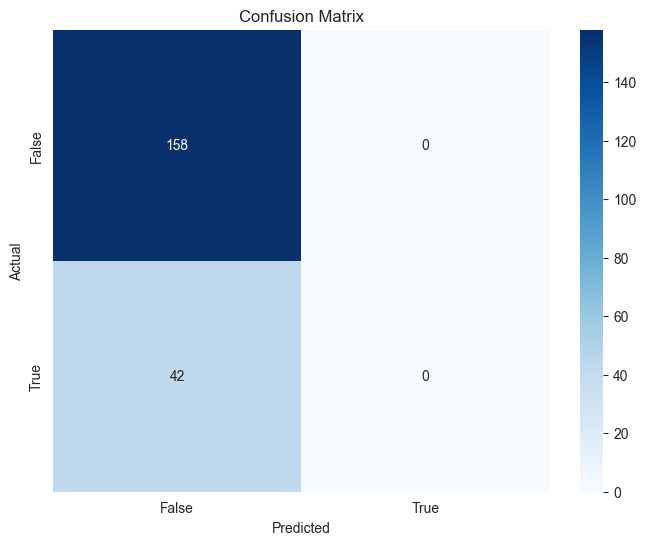

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_clf.classes_, yticklabels=best_clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()